<a href="https://colab.research.google.com/github/sofiacas-phy/SofiaCastro/blob/main/MLP_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TOPICS LEARNED:
#PyTorch tensors (a little more in depth)
#basic neural network
#Mean Squared Error (MSE) loss
#SGD optimizer

In [ ]:
#imports
import torch
import torch.nn as nn #neural network
import matplotlib.pyplot as plt


In [ ]:
#Generate training data

#Create 100 input values between 0 and 2π
x = torch.linspace(0, 2* torch.pi, 100).unsqueeze(1) #shape: [100,1]
#unsqueeze(1) turns shape from [100] to [100,1] so it's 2D and matches input expectations

y = torch.sin(x) #shape: [100,1]

In [ ]:
#Defining NN model
#1 hidden layer MLP

model = nn.Sequential(
    nn.Linear(1,10), #1 input -> 10 hidden units (in 1 hidden layer)
    nn.ReLU(), #chosen activation function to make it nonlinear
    nn.Linear(10,1)
)

In [ ]:
#Now defining Loss Function and Optimizer
loss_fn = nn.MSELoss() #mean squared error

#SGD with learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [ ]:
#Training Loop - teaches model to make accurate predictions
#this feeds it data and calculates the loss (wrong predictions)
#minimizes error by adjusting internal parameters

epochs = 1000

for epoch in range (epochs):
  #forward pass: computes predictions
  y_pred = model(x)
  #compute loss
  loss = loss_fn(y_pred,y)
  #zero gradients, backprop, and update weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print loss every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.9554
Epoch 100, Loss: 0.2524
Epoch 200, Loss: 0.2067
Epoch 300, Loss: 0.1865
Epoch 400, Loss: 0.1786
Epoch 500, Loss: 0.1732
Epoch 600, Loss: 0.1682
Epoch 700, Loss: 0.1633
Epoch 800, Loss: 0.1587
Epoch 900, Loss: 0.1544


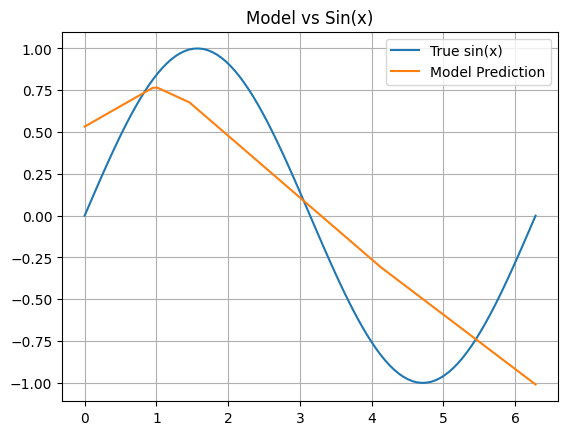

In [ ]:
#Plotting Learned vs True Function

plt.plot(x.detach().numpy(), y.detach().numpy(), label = "True sin(x)" )
plt.plot(x.detach().numpy(), y_pred.detach().numpy(), label = "Model Prediction")

#labelling
plt.legend()
plt.title("Model vs Sin(x)")
plt.grid(True)
plt.show()

In [ ]:
for epoch in range(epochs):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

if epoch % 100 == 0:
  print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

<function matplotlib.pyplot.show(close=None, block=None)>

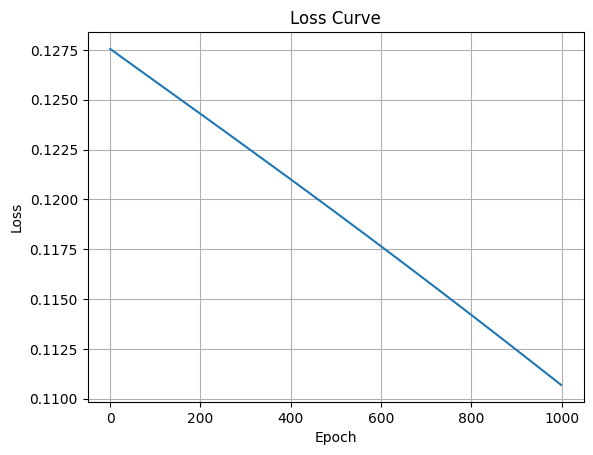

In [ ]:
#Visualize using a loss curve

losses = []

for epoch in range(epochs):
  y_pred = model(x)
  loss = loss_fn(y_pred,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

#Plot losses after training
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show

In [ ]:
#What this means:
#model is learning smoothly and consistently with each epoch
#loss goes down steadily

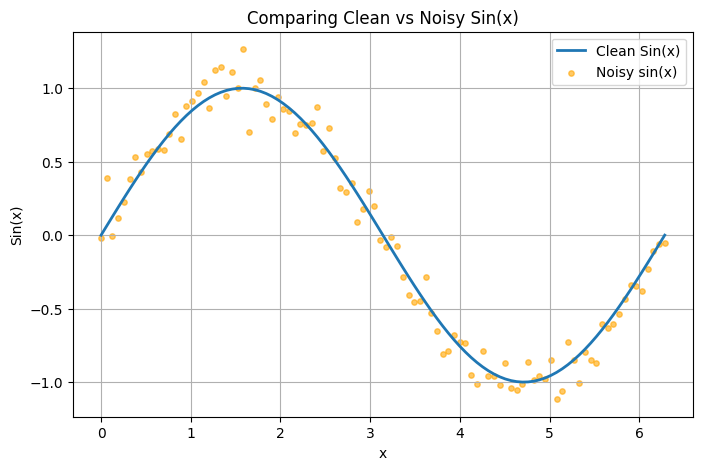

In [ ]:
#Adding noise (more realistic model)

noise = 0.1 * torch.randn_like(y) #new tensor with random values
y_noisy = y + noise

#convert to numpy for plotting
x_np = x.squeeze().numpy()
y_np = y.squeeze().numpy()
y_noisy_np = y_noisy.squeeze().numpy()

#plot
plt.figure(figsize=(8,5))
plt.plot(x_np, y_np, label = 'Clean Sin(x)', linewidth = 2)
plt.scatter(x_np, y_noisy_np, label = 'Noisy sin(x)', color = 'orange', s=15, alpha=0.6)
plt.title('Comparing Clean vs Noisy Sin(x)')
plt.xlabel("x")
plt.ylabel("Sin(x)")
plt.legend()
plt.grid(True)
plt.show()
